In [19]:
pip install fastai

Note: you may need to restart the kernel to use updated packages.


In [20]:
from fastai.vision.all import *

In [21]:
path=r"E:\archive\Snake Images\train"
images=get_image_files(path)
print(images[:5])

[Path('E:/archive/Snake Images/train/Non Venomous/0 (2).jpg'), Path('E:/archive/Snake Images/train/Non Venomous/0 (3).jpg'), Path('E:/archive/Snake Images/train/Non Venomous/0 (4).jpg'), Path('E:/archive/Snake Images/train/Non Venomous/0.jpg'), Path('E:/archive/Snake Images/train/Non Venomous/03.jpg')]


In [22]:
def get_labels(filepath):
    species=filepath.parent.name
    poison=filepath.parent.parent.name

    return [species,poison]
    

In [23]:
dls=DataBlock(blocks=(ImageBlock,MultiCategoryBlock),
              get_items=get_image_files,
              get_y=get_labels,
              splitter=RandomSplitter(0.2,seed=50),
              item_tfms=Resize(226),
              batch_tfms=aug_transforms()
                              
             ).dataloaders(path,bs=16)

In [24]:
print(dls.vocab)

['Non Venomous', 'Venomous', 'train']


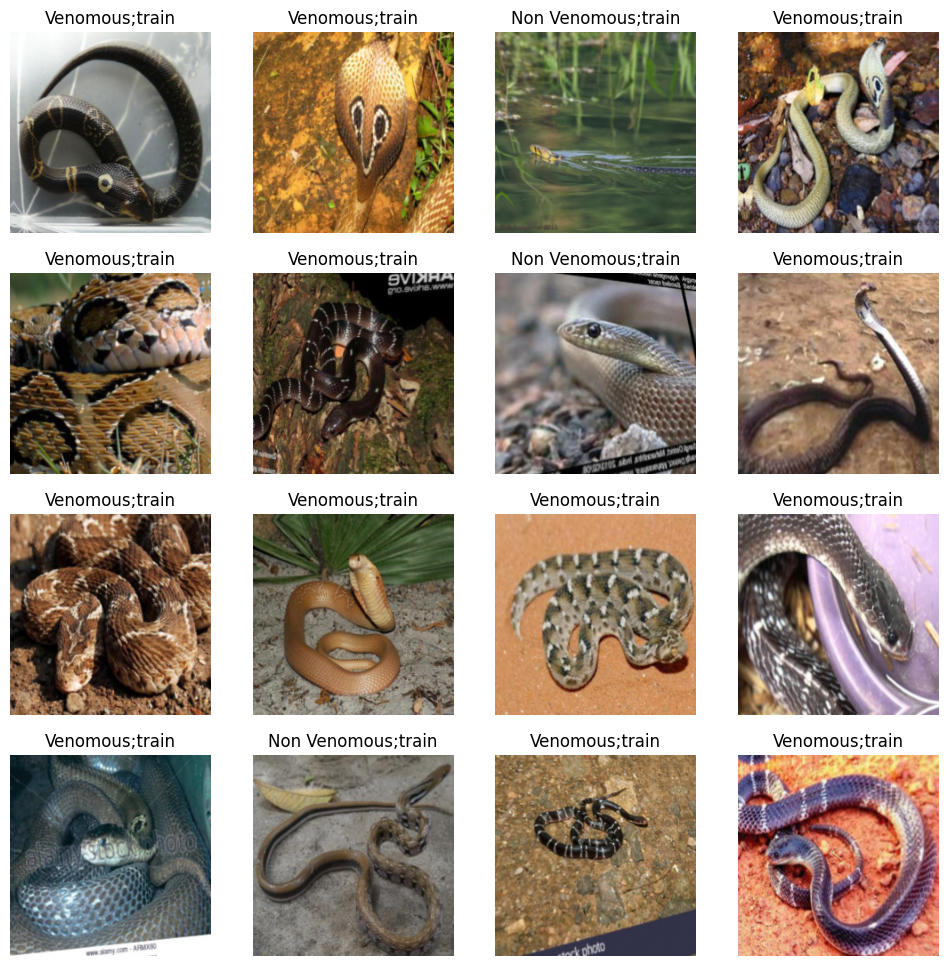

In [25]:
dls.show_batch(max_n=18)

In [26]:
learn=vision_learner(dls,resnet18,metrics=accuracy_multi)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.735211,0.492064,0.778404,05:44


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.479726,0.368586,0.852582,06:28
1,0.349327,0.295500,0.880751,05:47
2,0.250773,0.238366,0.904225,05:54
3,0.150036,0.226141,0.899531,06:32
4,0.109967,0.228037,0.911737,06:30


In [27]:
learn.validate()


(#2) [0.22803710401058197,0.9117370843887329]

In [61]:
learn.export(r'c:\Users\HP\Snake\Snake-Classification\snake_predict.pkl')
import os
print(os.getcwd())


c:\Users\HP\Snake\Snake-Classification


In [1]:
from fastai.vision.all import *

# Load model
learn = load_learner(r"c:\Users\HP\Snake\Snake-Classification\snake_predict.pkl")
print("✅ Model loaded successfully.")

# Path to image (must be a real image file like .jpg or .png)
image_path = r"E:\archive\Snake Images\test\Non Venomous\7696c19d1eb4846d81269ecb4c77f5a5.jpg"  # change this to real image

try:
    img = PILImage.create(image_path)
    pred, idx, probs = learn.predict(img)

    print(f"✅ Prediction successful!")
    print(f"🔹 Prediction labels: {pred}")
    print(f"🔹 Probabilities: {probs}")

    # Optional: Print species and venom status if your labels include them
    venomous_status = 'venomous' if 'venomous' in pred else ('non-venomous' if 'non-venomous' in pred else 'unknown')
    species = ", ".join([p for p in pred if p not in ['venomous', 'non-venomous']]) or pred[0]

    print(f"🧬 Species: {species}")
  

except FileNotFoundError:
    print("❌ Image file not found. Check the image_path.")
except Exception as e:
    print(f"❌ Prediction failed: {e}")


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


✅ Model loaded successfully.


✅ Prediction successful!
🔹 Prediction labels: ['Non Venomous', 'train']
🔹 Probabilities: tensor([0.8419, 0.1049, 0.9926])
🧬 Species: Non Venomous, train
